In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

In [187]:
def accuracy_report(y_true, y_pred, make_plot=True):
    print('MSE: {:.3f}'.format(mse(y_true, y_pred)))
    print('RMSE: {:.3f}'.format(np.sqrt(mse(y_true, y_pred))))
    print('MAE: {:.3f}'.format(mae(y_true, y_pred)))
    if make_plot:
        plt.figure(figsize=(8,6))
        plt.scatter(y_true, y_pred)
        plt.xlabel('Reality')
        plt.ylabel('Prediction')
        plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')

In [157]:
df = pd.read_csv("C:\\Users\\Lenar\\PycharmProjects\\python-parser-cian\\data.csv")
df["Price_per_meters"] = df["Price_per_month"]/(df["Square_meters"].astype(float))
df["Author"] = (df["Author"].astype(str))

df.head()

,Square_meters,Commissions %,Street,Link,District,Floor,Price_per_month,Author,All_floors,How_many_rooms,Price_per_meters
0,62,50,Sibgata Hakima,https://kazan.cian.ru/rent/flat/244424052/,Novo-Savinovskij,12,30000,ID 305100,18,2,483.870968
1,75,50,Dostoevskogo,https://kazan.cian.ru/rent/flat/243318735/,Vahitovskij,5,30000,ID 305100,12,2,400.000000
2,186,50,Sibgata Hakima,https://kazan.cian.ru/rent/flat/237818882/,Novo-Savinovskij,9,100000,ID 305100,16,4,537.634409
3,110,50,Tovarischeskaja,https://kazan.cian.ru/rent/flat/236848944/,Vahitovskij,5,50000,ID 305100,9,3,454.545455
4,220,50,Tolstogo,https://kazan.cian.ru/rent/flat/243010354/,Vahitovskij,9,130000,ID 305100,12,4,590.909091


### Отбросим некоторые признаки

In [158]:
del df['Link']
del df['Commissions %']
del df['Street']
del df['Price_per_month']

df.head()

,Square_meters,District,Floor,Author,All_floors,How_many_rooms,Price_per_meters
0,62,Novo-Savinovskij,12,ID 305100,18,2,483.870968
1,75,Vahitovskij,5,ID 305100,12,2,400.000000
2,186,Novo-Savinovskij,9,ID 305100,16,4,537.634409
3,110,Vahitovskij,5,ID 305100,9,3,454.545455
4,220,Vahitovskij,9,ID 305100,12,4,590.909091


### Рассмотрим, в каких районах больше всего предложений

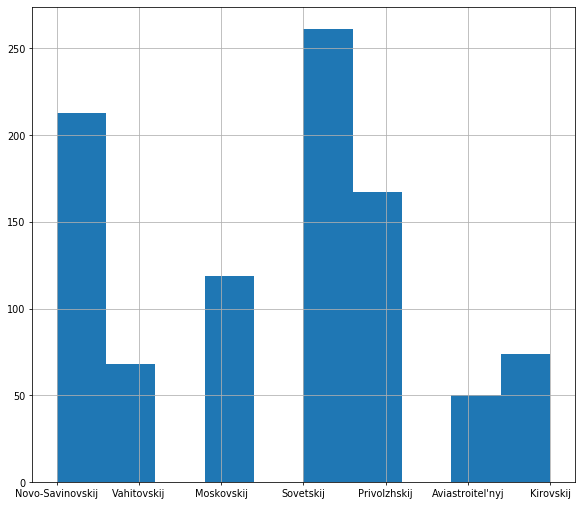

In [159]:
fig=plt.figure(figsize=(10, 9), dpi= 70, facecolor='w', edgecolor='k')
df['District'].hist()

### Распределение цен на квадратный метр в среднем по Казани

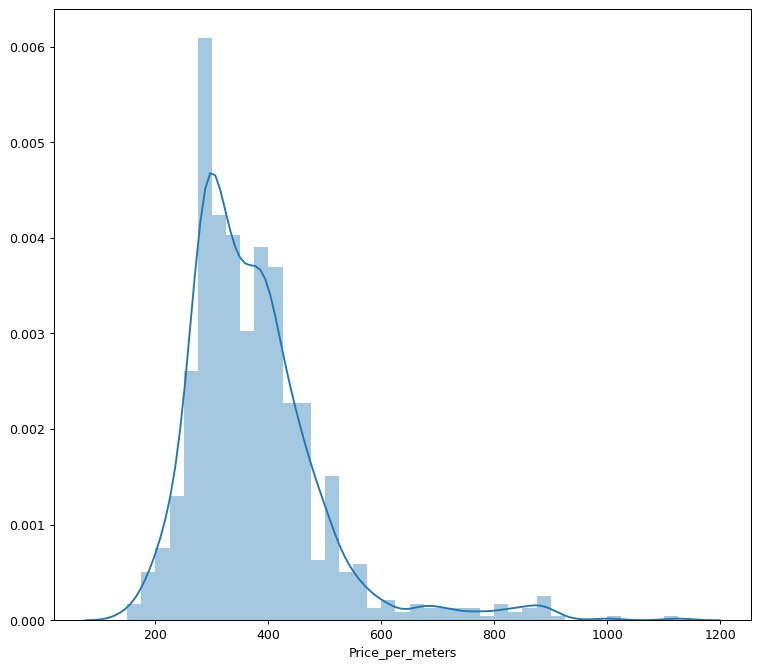

In [160]:
fig=plt.figure(figsize=(10, 9), dpi= 90, facecolor='w', edgecolor='k')
# df['Price_per_meters'].hist()

sns_plot = sns.distplot(df['Price_per_meters'])
fig = sns_plot.get_figure()


### Исследуем данные в зависимости от района

#### 1. Вахитовский район

In [161]:
data_vahitov = df.loc[df['District'] == 'Vahitovskij'].copy()
data_vahitov.head()

,Square_meters,District,Floor,Author,All_floors,How_many_rooms,Price_per_meters
1,75,Vahitovskij,5,ID 305100,12,2,400.000000
3,110,Vahitovskij,5,ID 305100,9,3,454.545455
4,220,Vahitovskij,9,ID 305100,12,4,590.909091
6,65,Vahitovskij,2,ID 305100,5,2,461.538462
8,85,Vahitovskij,15,ID 305100,20,3,823.529412


In [162]:
print(f"Среднее значение цены на метр в Вахитовском районе: {data_vahitov['Price_per_meters'].mean()}")

Среднее значение цены на метр в Вахитовском районе: 407.25989598671623


#### 2. Кировский район

In [163]:
data_kirov = df.loc[df['District'] == 'Kirovskij'].copy()
data_kirov.head()

,Square_meters,District,Floor,Author,All_floors,How_many_rooms,Price_per_meters
21,35,Kirovskij,1,Tsentral'noe agentstvo nedvizhimosti,5,1,371.428571
24,65,Kirovskij,7,Ramazan,18,2,184.615385
26,82,Kirovskij,5,ID 28840355,18,3,158.536585
33,82,Kirovskij,12,ID 28840355,18,3,280.487805
35,42,Kirovskij,3,ID 14443648,6,1,428.571429


In [164]:
print(f"Среднее значение цены на метр в Кировском районе: {data_kirov['Price_per_meters'].mean()}")

Среднее значение цены на метр в Кировском районе: 339.2622887407773


#### 3. Приволжский район

In [165]:
data_privol = df.loc[df['District'] == 'Privolzhskij'].copy()
data_privol.head()

,Square_meters,District,Floor,Author,All_floors,How_many_rooms,Price_per_meters
14,37,Privolzhskij,4,RamazanNa rynke s 2009 g.,9,1,405.405405
17,34,Privolzhskij,13,ID 15636838,19,1,588.205882
18,37,Privolzhskij,8,Tsentral'noe agentstvo nedvizhimosti,9,1,432.432432
20,45,Privolzhskij,6,Tsentral'noe agentstvo nedvizhimosti,10,1,411.111111
31,80,Privolzhskij,10,Stanislav Novikov,17,2,250.000000


In [166]:
print(f"Среднее значение цены на метр в Приволжском районе: {data_privol['Price_per_meters'].mean()}")

Среднее значение цены на метр в Приволжском районе: 388.4443543770934


#### 4. Ново-Савиновский район

In [167]:
data_novsav = df.loc[df['District'] == 'Novo-Savinovskij'].copy()
data_novsav.head()

,Square_meters,District,Floor,Author,All_floors,How_many_rooms,Price_per_meters
0,62,Novo-Savinovskij,12,ID 305100,18,2,483.870968
2,186,Novo-Savinovskij,9,ID 305100,16,4,537.634409
5,100,Novo-Savinovskij,8,ID 305100,9,3,350.000000
7,33,Novo-Savinovskij,5,Tat'jana Kazanskaja,10,1,454.545455
16,32,Novo-Savinovskij,4,ID 13111077,5,1,343.750000


In [168]:
print(f"Среднее значение цены на метр в Ново-Савиновском районе: {data_novsav['Price_per_meters'].mean()}")

Среднее значение цены на метр в Ново-Савиновском районе: 349.7515987181038


### Распределение цен на квадратный метр в зависимости от районов

Text(0, 0.5, 'Плотность')

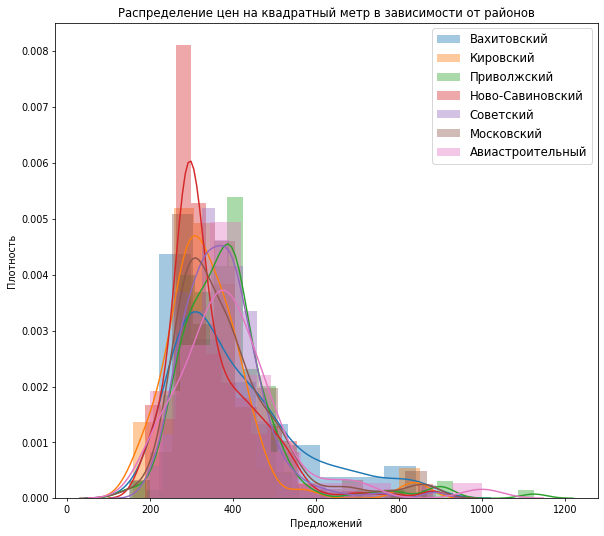

In [169]:
fig=plt.figure(figsize=(10, 9), dpi= 70, facecolor='w', edgecolor='k')
sns.distplot(data_vahitov['Price_per_meters'],  kde=True, label='Вахитовский')
sns.distplot(data_kirov['Price_per_meters'],  kde=True, label='Кировский')
sns.distplot(data_privol['Price_per_meters'],  kde=True, label='Приволжский')
sns.distplot(data_novsav['Price_per_meters'],  kde=True, label='Ново-Савиновский')
sns.distplot(df.loc[df['District'] == 'Sovetskij']['Price_per_meters'],  kde=True, label='Советский')
sns.distplot(df.loc[df['District'] == 'Moskovskij']['Price_per_meters'],  kde=True, label='Московский')
sns.distplot(df.loc[df['District'] == "Aviastroitel'nyj"]['Price_per_meters'],  kde=True, label='Авиастроительный')


plt.legend(prop={'size': 12})
plt.title('Распределение цен на квадратный метр в зависимости от районов')
plt.xlabel('Предложений')
plt.ylabel('Плотность')

### Распределение цен на квадратный метр в зависимости от количества комнат

C:\Users\Lenar\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Text(0, 0.5, 'Плотность')

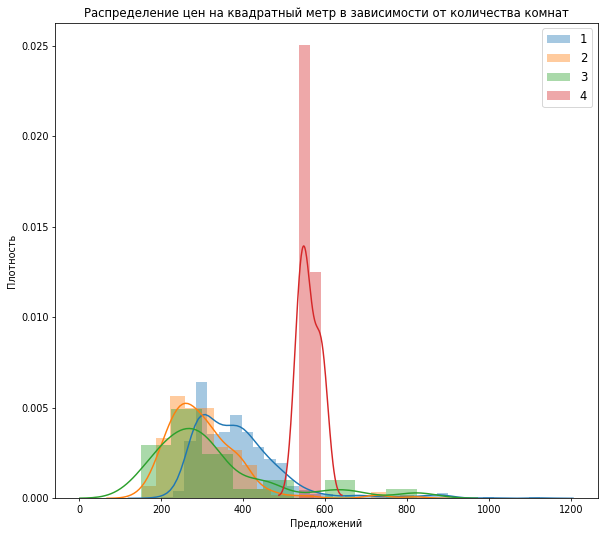

In [170]:
data_novsav = df.loc[df['How_many_rooms'] == '1']['Price_per_meters']


fig=plt.figure(figsize=(10, 9), dpi= 70, facecolor='w', edgecolor='k')
sns.distplot(df.loc[df['How_many_rooms'] == 1]['Price_per_meters'],  kde=True, label='1')
sns.distplot(df.loc[df['How_many_rooms'] == 2]['Price_per_meters'],  kde=True, label='2')
sns.distplot(df.loc[df['How_many_rooms'] == 3]['Price_per_meters'],  kde=True, label='3')
sns.distplot(df.loc[df['How_many_rooms'] == 4]['Price_per_meters'],  kde=True, label='4')

plt.legend(prop={'size': 12})
plt.title('Распределение цен на квадратный метр в зависимости от количества комнат')
plt.xlabel('Предложений')
plt.ylabel('Плотность')

### Распределение цен на квадратный метр в зависимости от этажности квартиры

Text(0, 0.5, 'Плотность')

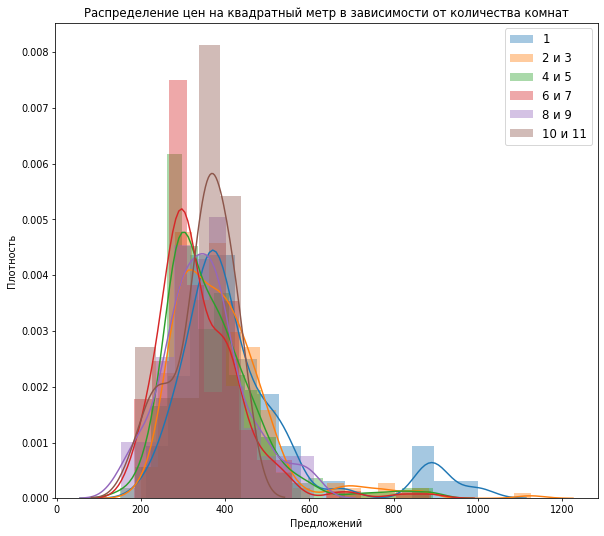

In [171]:

fig=plt.figure(figsize=(10, 9), dpi= 70, facecolor='w', edgecolor='k')
sns.distplot(df.loc[df['Floor'] == 1]['Price_per_meters'],  kde=True, label='1')
sns.distplot(df.loc[df['Floor'] > 1].loc[df['Floor'] < 4]['Price_per_meters'],  kde=True, label='2 и 3')
sns.distplot(df.loc[df['Floor'] >= 4].loc[df['Floor'] < 6]['Price_per_meters'],  kde=True, label='4 и 5')
sns.distplot(df.loc[df['Floor'] >= 6].loc[df['Floor'] < 8]['Price_per_meters'],  kde=True, label='6 и 7')
sns.distplot(df.loc[df['Floor'] >= 8].loc[df['Floor'] < 10]['Price_per_meters'],  kde=True, label='8 и 9')
sns.distplot(df.loc[df['Floor'] >= 10].loc[df['Floor'] < 12]['Price_per_meters'],  kde=True, label='10 и 11')

plt.legend(prop={'size': 12})
plt.title('Распределение цен на квадратный метр в зависимости от количества комнат')
plt.xlabel('Предложений')
plt.ylabel('Плотность')

### Преобразуем нечисловые признаки в числовые

In [173]:
enc = LabelEncoder()
df.iloc[:,1] = enc.fit_transform(df.iloc[:,1])

df.head()

,Square_meters,District,Floor,Author,All_floors,How_many_rooms,Price_per_meters
0,62,3,12,47,18,2,483.870968
1,75,6,5,47,12,2,400.000000
2,186,3,9,47,16,4,537.634409
3,110,6,5,47,9,3,454.545455
4,220,6,9,47,12,4,590.909091


### Построим гистаграмму распределения объявлений

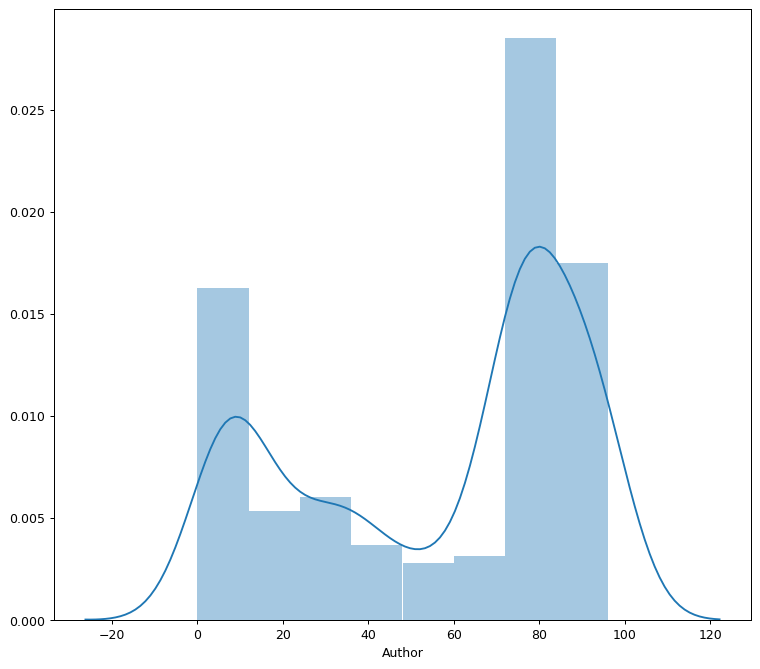

In [181]:
fig=plt.figure(figsize=(10, 9), dpi= 90)

sns_plot = sns.distplot(df['Author'])
fig = sns_plot.get_figure()


### Применим линейную модель

MSE: 7702.691
RMSE: 87.765
MAE: 64.242


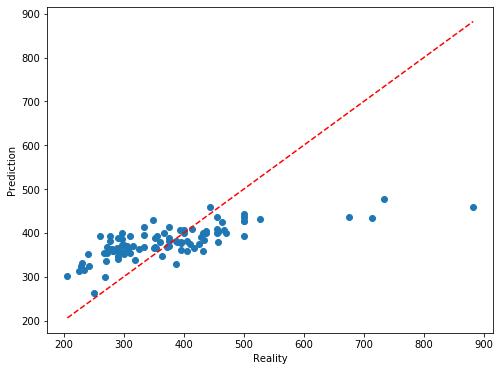

In [188]:
train_data, test_data, train_labels, test_labels = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size = 0.1, random_state=0)

model = LinearRegression()
model.fit(X=train_data, y=train_labels)

accuracy_report(test_labels, model.predict(test_data))


### Также применим линейную модель, но предварительно удалив ещё один признак

In [189]:
df2 = df.copy()
df2.head()

,Square_meters,District,Floor,Author,All_floors,How_many_rooms,Price_per_meters
0,62,3,12,47,18,2,483.870968
1,75,6,5,47,12,2,400.000000
2,186,3,9,47,16,4,537.634409
3,110,6,5,47,9,3,454.545455
4,220,6,9,47,12,4,590.909091


In [190]:
del df2['Author']

df2.head()

,Square_meters,District,Floor,All_floors,How_many_rooms,Price_per_meters
0,62,3,12,18,2,483.870968
1,75,6,5,12,2,400.000000
2,186,3,9,16,4,537.634409
3,110,6,5,9,3,454.545455
4,220,6,9,12,4,590.909091


MSE: 7918.351
RMSE: 88.985
MAE: 65.996


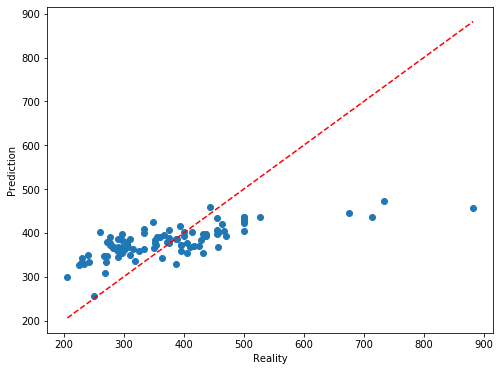

In [191]:
train_data, test_data, train_labels, test_labels = train_test_split(df2.iloc[:, :-1], df2.iloc[:, -1], test_size = 0.1, random_state=0)
model = LinearRegression()
model.fit(X=train_data, y=train_labels)

accuracy_report(test_labels, model.predict(test_data))
